Отток клиентов банка

RowNumber - номер записи (строки).
CustomerId - Id клиента.
Surname - фамилия клиента.
CreditScore - кредитный рейтинг клиента.
Geography - местоположение клиента.
Gender - пол клиента.
Age - возраст клиента.
Tenure - это количество лет, в течение которых клиент был клиентом банка. 
Balance - остаток на счетах клиента.
NumOfProducts - количество продуктов, приобретенных клиентом через банк.
HasCrCard - указывает, есть ли у клиента кредитная карта (1 - карта есть, 0 - нет).
IsActiveMember - показатель активности клиента (1 - активный, 0- нет).
EstimatedSalary - расчетная зарплата клиента.
Exited - принимает значение 1, если клиент покинул банк, 0 - если остался.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('churn.csv') # загружае датасет

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info() # убеждаемся в отсутствии пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


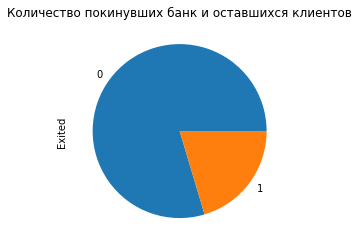

In [ ]:
pie_data = df['Exited'].value_counts()
pie_data.plot(kind= 'pie', title= 'Количество покинувших банк и оставшихся клиентов') 

Делаем вывод, что количество клиентов, покинувших банк, значительно меньше тех, кто остался

Text(0.5, 1.0, 'Распределение оттока клиентов в зависимости от наличия у них кредитных карт банка')

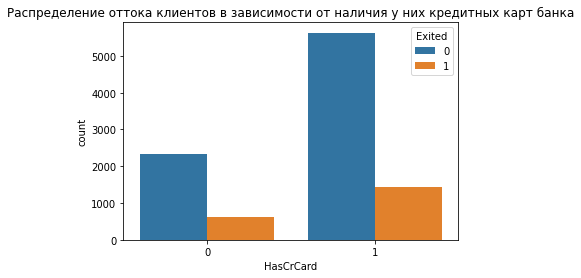

In [ ]:
sns.countplot(data = df, x='HasCrCard', hue = 'Exited') 
plt.title('Распределение оттока клиентов в зависимости от наличия у них кредитных карт банка')

Покинувших банк клиентов и, приэтом, имеющих кредитную карту больше, чем клиентов, которые покинули банк и не имели карту. Можно сделать вывод, что наличие кредитной карты не является для клиента сдерживающим факторомю

Text(0.5, 1.0, 'Распределение оттока клиентов в зависимости от возраста')

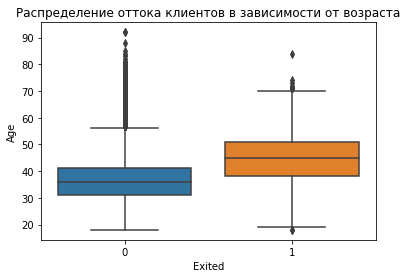

In [ ]:
sns.boxplot(x= 'Exited', y= 'Age', data = df)
plt.title('Распределение оттока клиентов в зависимости от возраста')

Видим, что медианный возраст покунувших банк клиентов на порядок выше (примерная разница 10 лет) оставшихся в банке. Вместе с тем, люди более старшего возраста (представлено в виде множества выбросов) предпочитают оставаться в своем банке. Зависимость межде возрастом и решением уйти или остаться в банке существуетю

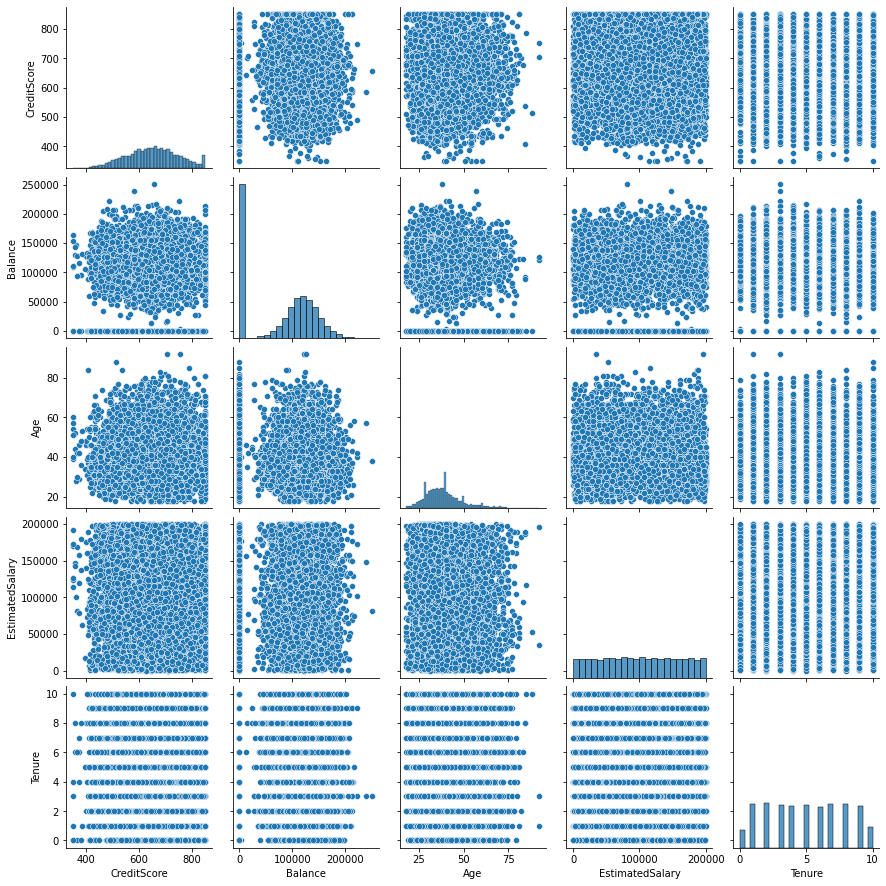

In [ ]:
sns.pairplot(df[['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']])

Явной зависимости между выбранными показателями не наблюдается. Можно с осторожностью предположить, что чем продолжительнее отношения клиента с банком, тем выше его кредитный рейтинг. Также можно заметить значительную плотность графика на пересечении показателей расчетной зарплаты и возраста (клиенты в возрасте 25-50 лет имеют максимальную зарплату, что логично).